## K-means clustering with the iris data

In [1]:
# K-means clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy.spatial.distance import cdist, pdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
df = pd.read_csv('../dataset/iris-dataset/Iris.csv')

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [41]:
# Choosing the no. of cluster is the question
# let's try with 3 cluster

k_means_fit = KMeans(n_clusters=3, max_iter=300)
k_means_fit.fit(X)

print('\nK-Means Clustering - Confusion Matrix\n\n', pd.crosstab(y, k_means_fit.labels_,
                                                                rownames=['Actual'], colnames=['Predicted']), sep='')
print('\nSilhouette-Score: %0.3f' % silhouette_score(X, k_means_fit.labels_, metric='euclidean'))


K-Means Clustering - Confusion Matrix

Predicted         0   1   2
Actual                     
Iris-setosa      50   0   0
Iris-versicolor   0  48   2
Iris-virginica    0  14  36

Silhouette-Score: 0.553


From the previous confusion matrix, we can see that 1 out of 50 setosa flowers are clustered
incorrectly, and 1 out of 50 versicolor, whereas none of the virginica flowers are incorrectly
classified.

Again, to reiterate, in real-life examples we do not have the category
names in advance, so we cannot measure accuracy, and so on.

Following code is used to perform sensitivity analysis to check how many number of
clusters does actually provide better explanation of segments:

In [42]:
np.unique(k_means_fit.labels_)
# 0, 1, 2 are the cluster labels

array([0, 1, 2])

Evaluation of clusters with silhouette coefficient: the silhouette coefficient is a measure of
the compactness and separation of the clusters. Higher values represent a better quality of
cluster. The silhouette coefficient is higher for compact clusters that are well separated and
lower for overlapping clusters. Silhouette coefficient values do change from -1 to +1, and the
higher the value is, the better.

In [43]:
for k in range(2, 10):
    k_means_fitk = KMeans(n_clusters=k, max_iter=300)
    k_means_fitk.fit(X)
    print("For K value", k, ", Silhouette-Score: %0.3f" % silhouette_score(X, k_means_fit.labels_, metric='euclidean'))

For K value 2 , Silhouette-Score: 0.553
For K value 3 , Silhouette-Score: 0.553
For K value 4 , Silhouette-Score: 0.553
For K value 5 , Silhouette-Score: 0.553
For K value 6 , Silhouette-Score: 0.553
For K value 7 , Silhouette-Score: 0.553
For K value 8 , Silhouette-Score: 0.553
For K value 9 , Silhouette-Score: 0.553


As a thumb rule, we need to take the
next K value of the highest silhouette coefficient.

Since all has k value has the same score, we pick the K value 3

In addition, we also need to see the average within cluster variation value and elbow
plot before concluding the optimal K value.

In [50]:
centroids[0]

array([[5.84333333, 3.054     , 3.75866667, 1.19866667]])

In [46]:
X[:2]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [56]:
sum(dist[0]) / X.shape[0]

1.9430341590370264

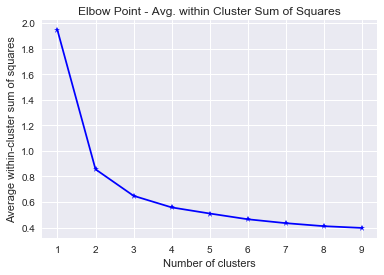

In [48]:
# Avg. within-cluster sum of squares
K = range(1, 10)

KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, centrds, 'euclidean') for centrds in centroids]

cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / X.shape[0] for d in dist]

# Total within sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2 / X.shape[0])
bss = tss - wcss

# Elbow curve - Avg. within cluster sum of squares
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
plt.title('Elbow Point - Avg. within Cluster Sum of Squares')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.show()

From the elbow plot, it seems that at the value of three, the slope changes drastically. Here,
we can select the optimal k-value as three.

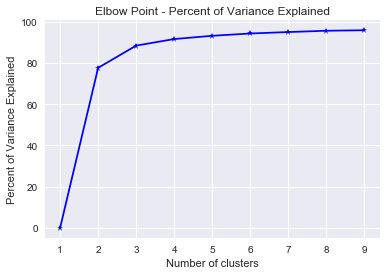

In [49]:
# elbow curve - percentage of variance explained

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.title('Elbow Point - Percent of Variance Explained')
plt.xlabel('Number of clusters')
plt.ylabel('Percent of Variance Explained')
plt.show()

Last but not least, the total percentage of variance explained value should be greater than 80
percent to decide the optimal number of clusters. Even here, a k-value of three seems to
give a decent value of total variance explained. Hence, we can conclude from all the
preceding metrics (silhouette, average within cluster variance, and total variance
explained), that three clusters are ideal.

In [10]:
# References and credits to
# Statistics for Machine Learning
# dataset from: https://archive.ics.uci.edu/ml/datasets/iris
# https://www.datascience.com/blog/k-means-clustering